Total fires detected: 4726
Average FRP: 15.88 MW
Highest confidence fires: 712


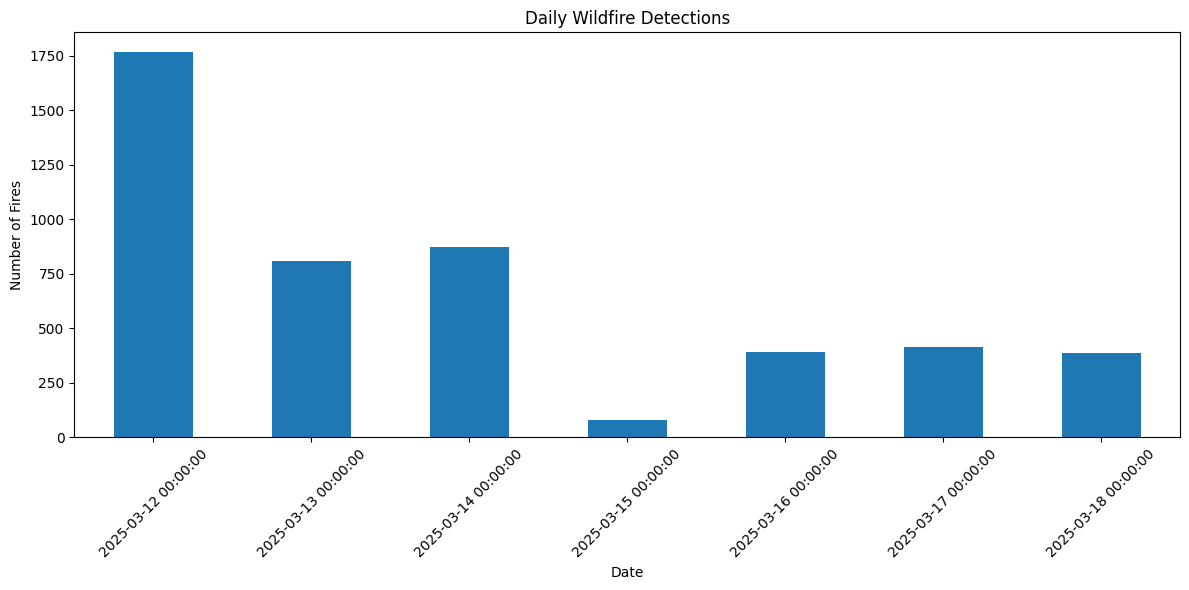

In [6]:
import geojson
import folium
import pandas as pd
from datetime import datetime

# Load GeoJSON data
with open('viirs_fires_country.geojson') as f:
    data = geojson.load(f)

# Convert to pandas DataFrame
features = data['features']
df = pd.DataFrame([feature['properties'] for feature in features])
df['geometry'] = [feature['geometry'] for feature in features]

# Convert date strings to datetime objects
df['acq_date'] = pd.to_datetime(df['acq_date'])

# Filter data (e.g., last 7 days)
end_date = datetime.now()
start_date = end_date - pd.Timedelta(days=7)
df_filtered = df[(df['acq_date'] >= start_date) & (df['acq_date'] <= end_date)]

# Create map
m = folium.Map(location=[df_filtered['latitude'].mean(), df_filtered['longitude'].mean()], zoom_start=4)

# Add fire markers
for _, row in df_filtered.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['frp']/10,  # Adjust size based on Fire Radiative Power
        popup=f"Date: {row['acq_date']}<br>FRP: {row['frp']} MW<br>Confidence: {row['confidence']}",
        color='red',
        fill=True
    ).add_to(m)

# Save map
m.save('wildfire_map.html')

# Print basic statistics
print(f"Total fires detected: {len(df_filtered)}")
print(f"Average FRP: {df_filtered['frp'].mean():.2f} MW")
print(f"Highest confidence fires: {len(df_filtered[df_filtered['confidence'] == 'h'])}")

# Create time series plot
import matplotlib.pyplot as plt

daily_counts = df_filtered.groupby('acq_date').size()
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='bar')
plt.title('Daily Wildfire Detections')
plt.xlabel('Date')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('daily_fires.png')


In [8]:
import os

# Get the current working directory
current_dir = os.getcwd()
print(current_dir)

/Users/pranathy/Documents/Illinois Tech/Semester 4/Wildfire Detection/Wildfire-Detection-CV-Geospatial/VIIRS Analysis
